# Plant Characteristics Plots
This notebook produces plots for biomass and structure counts for the calibration trial destructive samples.

In [101]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from collections import OrderedDict

In [2]:
# Import data
df = pd.read_csv('biomass_short_scrape.csv')
df.set_index('Sample ID', inplace=True)
df.drop(columns=['Plant ID', 'Cultivar'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, ta_Big_Beef_Day_Zero to gp_10_09_14_2023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       24 non-null     object 
 1   Sampling Age  24 non-null     int64  
 2   Leaf No       24 non-null     int64  
 3   Stem No       24 non-null     int64  
 4   Leaf Biomass  24 non-null     float64
 5   Stem Biomass  24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB
None


In [3]:
# Create a dataframe with the mean value for each species and sampling age
df_mean = df.groupby(['Species', 'Sampling Age']).mean().reset_index()

In [4]:
# Round leaf no and stem no to the nearest integer
df_mean['Leaf No'] = df_mean['Leaf No'].round(0).astype(int)
df_mean['Stem No'] = df_mean['Stem No'].round(0).astype(int)

In [5]:
# Create a column for aboveground biomass
df_mean['Aboveground Biomass'] = df_mean['Leaf Biomass'] + df_mean['Stem Biomass']

In [6]:
print(df_mean)

      Species  Sampling Age  Leaf No  Stem No  Leaf Biomass  Stem Biomass  \
0      Tomato             0       12        2      2.100000      2.523333   
1      Tomato             2       19        4      7.900000      7.775000   
2      Tomato             5      122       10     25.243333     31.753333   
3      Tomato            10      686       39    106.036667    154.773333   
4      Tomato            15      944       50    181.683333    244.663333   
5  Watermelon             0       18        3      1.460000      1.385000   
6  Watermelon             2       43        4     10.170000      4.235000   
7  Watermelon             5       22        2      2.140000      1.755000   
8  Watermelon            10      826       51    273.900000    205.435000   
9  Watermelon            15      988       41    324.665000    292.030000   

   Aboveground Biomass  
0             4.623333  
1            15.675000  
2            56.996667  
3           260.810000  
4           426.346667  
5 

In [7]:
# create a df for each species
tdf = df_mean[df_mean['Species'] == 'Tomato']
wdf = df_mean[df_mean['Species'] == 'Watermelon']

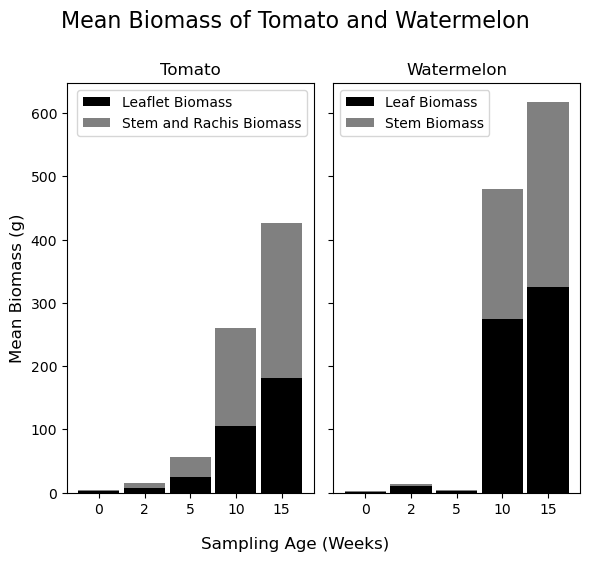

In [8]:
# Create a figure with shared y axes for tomato and watermelon biomass
fig, ax = plt.subplots(1, 2, figsize=(6, 6), sharey=True)
fig.suptitle('Mean Biomass of Tomato and Watermelon', fontsize=16, y = 0.90)
# Plot leaf and stem biomass as a stacked bar chart for tomato
tdf.plot(x='Sampling Age', y=['Leaf Biomass', 'Stem Biomass'], kind='bar', 
stacked=True, ax=ax[0], color=['black', 'grey'], width=0.9)
ax[0].set_title('Tomato')
ax[0].set_ylabel('Mean Biomass (g)', fontsize=12)
ax[0].legend(['Leaflet Biomass', 'Stem and Rachis Biomass'])
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
# Plot leaf and stem biomass as a stacked bar chart for watermelon
wdf.plot(x='Sampling Age', y=['Leaf Biomass', 'Stem Biomass'], kind='bar', 
stacked=True, ax=ax[1], color=['black', 'grey'], width=0.9)
ax[1].set_title('Watermelon')
ax[1].legend(['Leaf Biomass', 'Stem Biomass'])
ax[1].set_xlabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
# add a combined x axis label
fig.text(0.5, 0.01, 'Sampling Age (Weeks)', ha='center', va='center', fontsize=12)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()
#	Save the figure
fig.savefig('plot_figs/biomass_bar_chart.png', dpi=300, bbox_inches='tight')

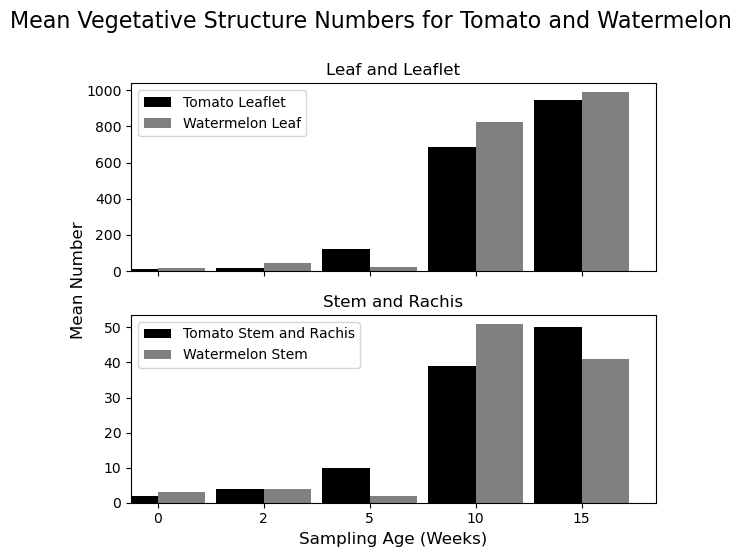

In [9]:
# Create a figure with shared x axes for stem and leaf number
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
fig.suptitle('Mean Vegetative Structure Numbers for Tomato and Watermelon', fontsize=16, y = 0.95)
# Plot leaf number side-by-side for tomato and watermelon
tdf.plot(x='Sampling Age', y='Leaf No', kind='bar', ax=ax[0], color='black', 
width=0.45, position=1)
wdf.plot(x='Sampling Age', y='Leaf No', kind='bar', ax=ax[0], color='grey', 
width=0.45, position=0)
ax[0].set_title('Leaf and Leaflet', size=12)
ax[0].legend(['Tomato Leaflet', 'Watermelon Leaf'])
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
# Plot stem number side-by-side for tomato and watermelon
tdf.plot(x='Sampling Age', y='Stem No', kind='bar', ax=ax[1], color='black',
width=0.45, position=1)
wdf.plot(x='Sampling Age', y='Stem No', kind='bar', ax=ax[1], color='grey',
width=0.45, position=0)
ax[1].set_title('Stem and Rachis', size=12)
ax[1].legend(['Tomato Stem and Rachis', 'Watermelon Stem'])
ax[1].set_xlabel('Sampling Age (Weeks)', fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
fig.text(0, 0.5, 'Mean Number', va='center', rotation='vertical', fontsize=12)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Save the figure
fig.savefig('plot_figs/biomass_veg_num.png', dpi=300, bbox_inches='tight')

In [53]:
print(tdf['Sampling Age'].values)

[ 0  2  5 10 15]


In [69]:
# Convert sampling age to str for the x-axis labels
tdf['Sampling Age'] = tdf['Sampling Age'].astype(str)
wdf['Sampling Age'] = wdf['Sampling Age'].astype(str)

C:\Users\Steven\AppData\Local\Temp\ipykernel_1036\270156033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Sampling Age'] = tdf['Sampling Age'].astype(str)
C:\Users\Steven\AppData\Local\Temp\ipykernel_1036\270156033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['Sampling Age'] = wdf['Sampling Age'].astype(str)


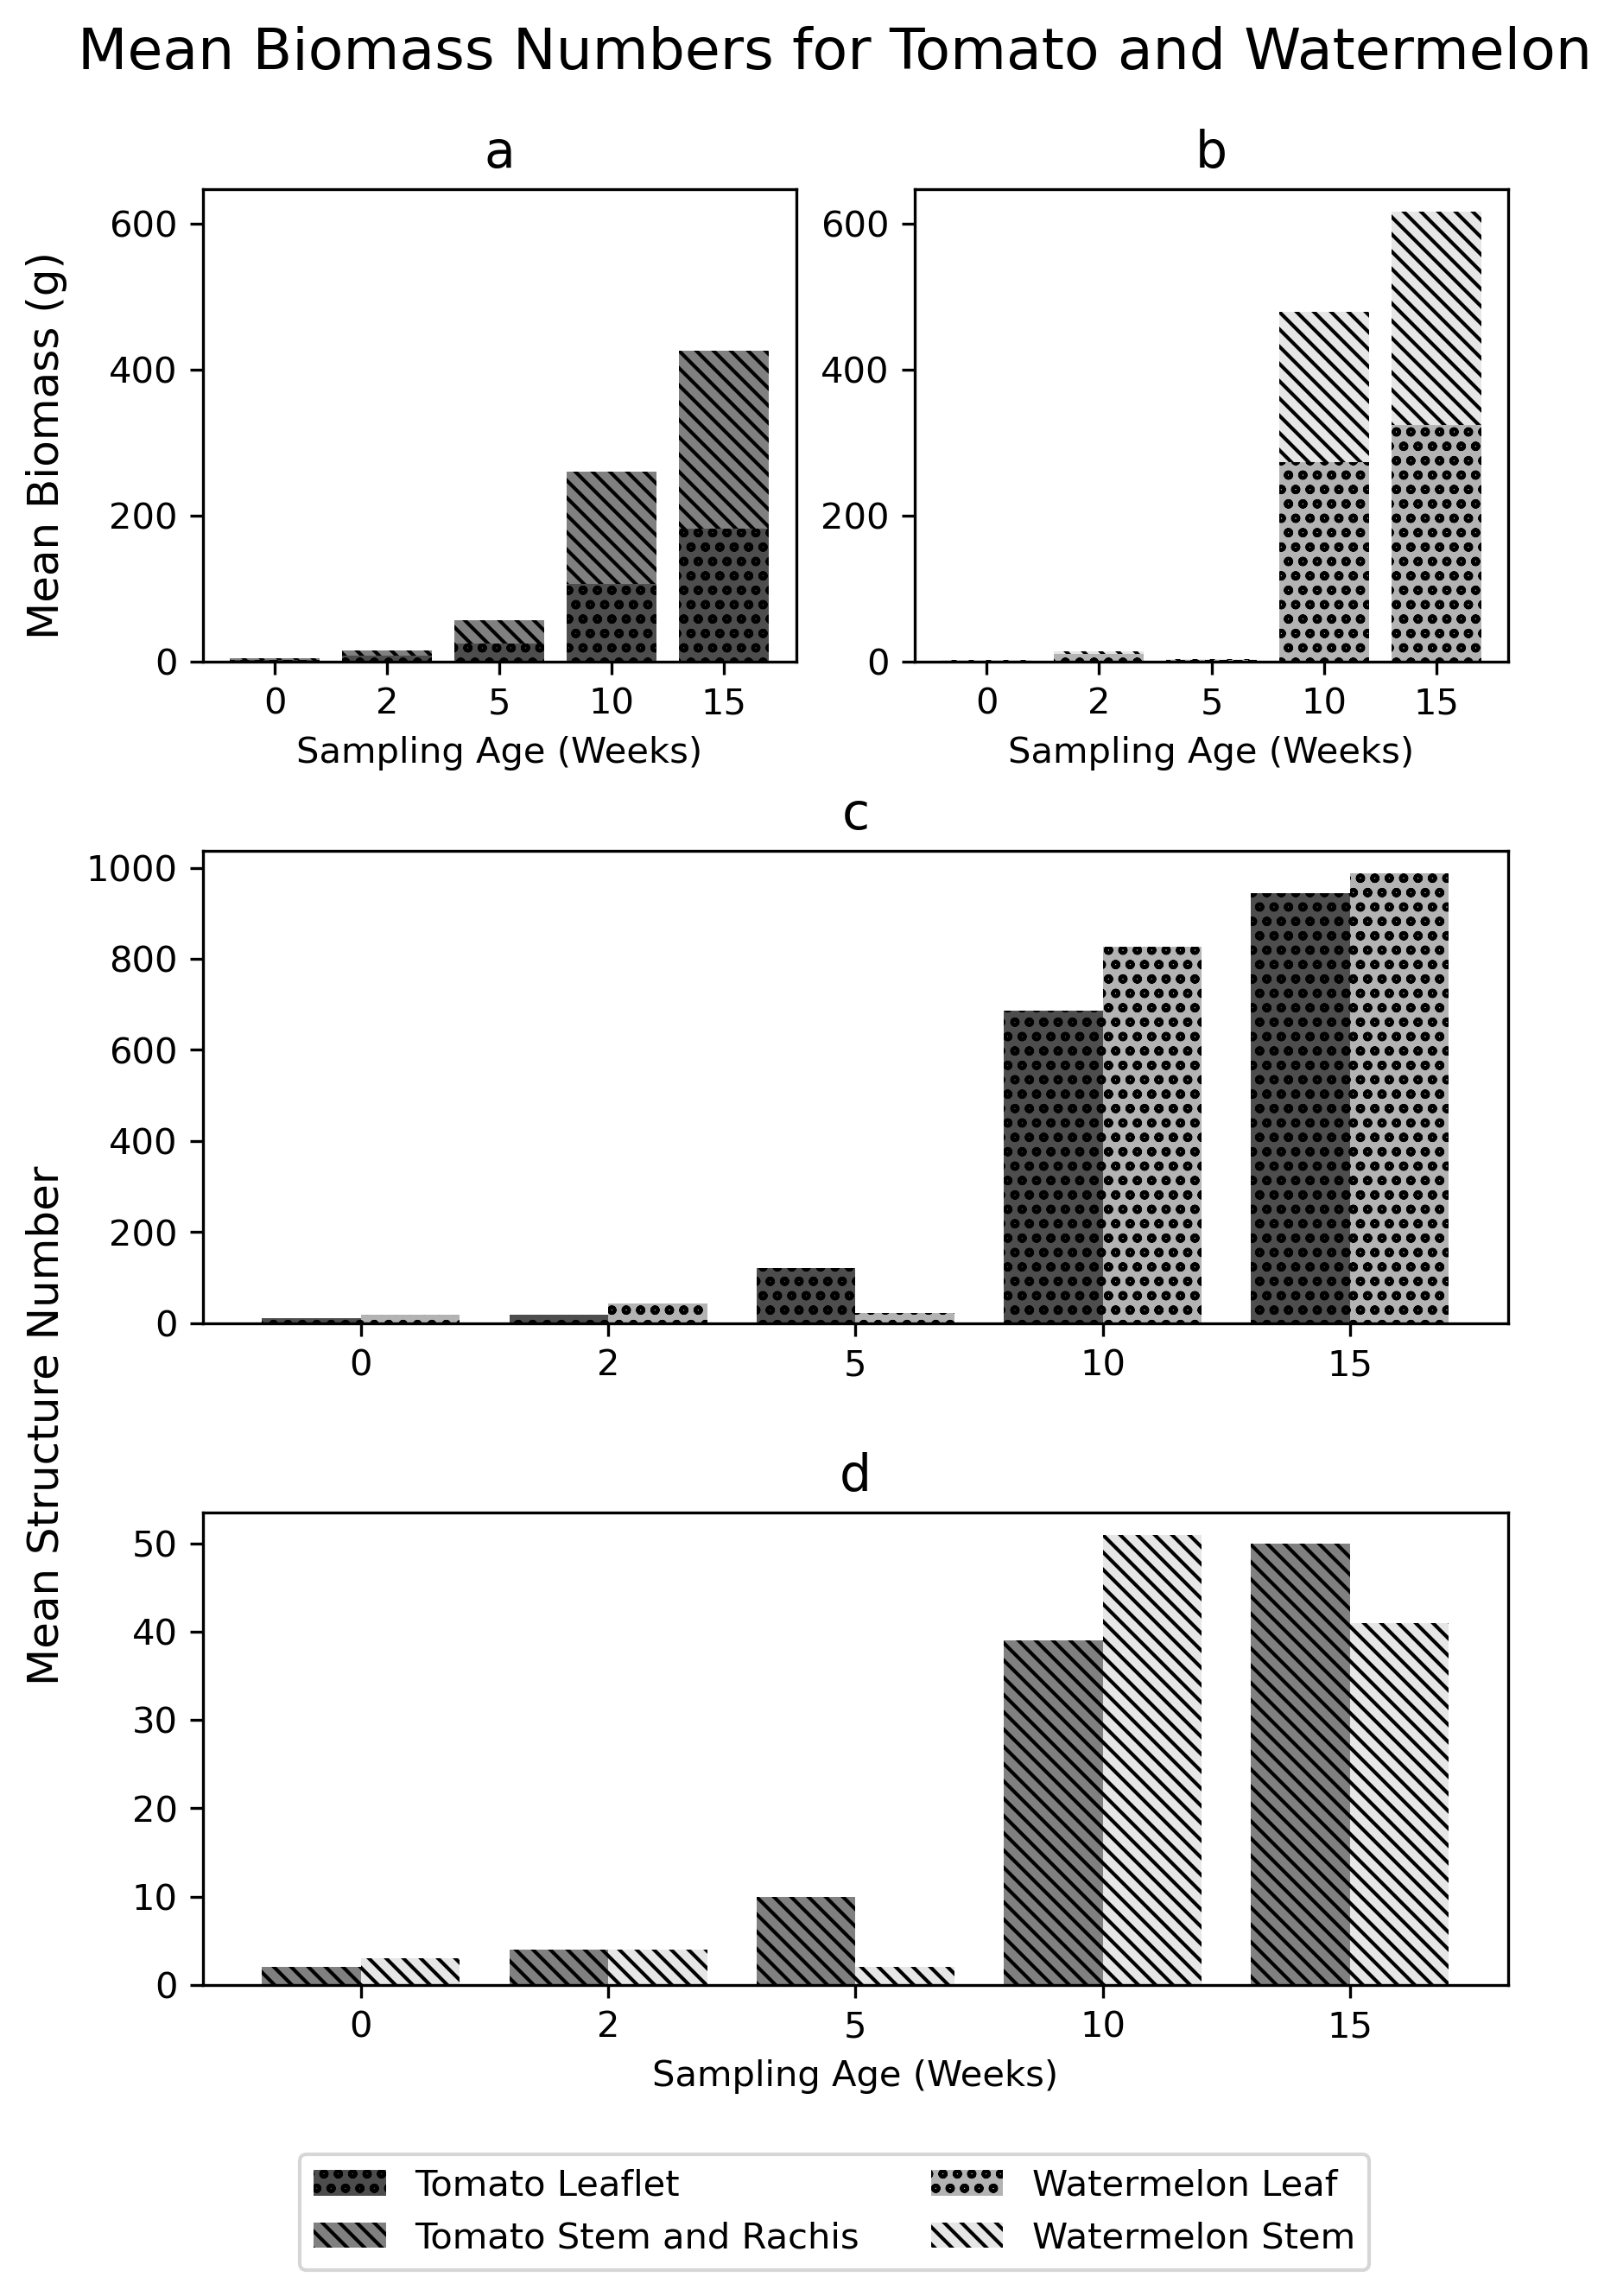

In [111]:
# Make combined figure with biomass and vegetative structure numbers
fig = plt.figure(figsize=(6.5, 9), dpi=300)
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], hspace=0.4)

cats = ['Tomato Leaflet', 'Tomato Stem and Rachis', 
		'Watermelon Leaf', 'Watermelon Stem']

shades = ['0.3', '0.5', '0.7', '0.9']

hatches = ['\\\\\\\\\\', 'ooo']

# Add the biomass bar chart to the first row
ax1 = fig.add_subplot(gs[0, 0])
tlb = ax1.bar(tdf['Sampling Age'], tdf['Leaf Biomass'], 
			  color=shades[0], hatch=hatches[1], label=cats[0])
tsb = ax1.bar(tdf['Sampling Age'], tdf['Stem Biomass'], 
			  bottom=tdf['Leaf Biomass'], color=shades[1], hatch=hatches[0], label=cats[1])
ax1.set_title('a', fontsize=14)
ax1.set_xlabel('Sampling Age (Weeks)')

ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
wlb = ax2.bar(wdf['Sampling Age'], wdf['Leaf Biomass'], 
			  color=shades[2], hatch=hatches[1], label=cats[2])
wsb = ax2.bar(wdf['Sampling Age'], wdf['Stem Biomass'],
			  bottom=wdf['Leaf Biomass'], color=shades[3], hatch=hatches[0], label=cats[3])
ax2.set_title('b', fontsize=14)
ax2.set_xlabel('Sampling Age (Weeks)')

# Add structure numbers to the second and third rows
width = 0.4
x = np.arange(len(tdf['Sampling Age']))
ax3 = fig.add_subplot(gs[1, :])
tln = ax3.bar(x - width/2, tdf['Leaf No'], width=width,
			  color=shades[0], hatch=hatches[1], label=cats[0])
wln = ax3.bar(x + width/2, wdf['Leaf No'], width=width,
			  color=shades[2], hatch=hatches[1], label=cats[2])
ax3.set_title('c', fontsize=14)
ax3.set_xticks(np.arange(len(tdf['Sampling Age'])))
ax3.set_xticklabels(tdf['Sampling Age'])

# Add stem numbers
ax4 = fig.add_subplot(gs[2, :], sharex=ax3)
tsn = ax4.bar(x - width/2, tdf['Stem No'], width=width,
			  color=shades[1], hatch=hatches[0], label=cats[1])
wsn = ax4.bar(x + width/2, wdf['Stem No'], width=width,
			  color=shades[3], hatch=hatches[0], label=cats[3])
ax4.set_title('d', fontsize=14)
ax4.set_xlabel('Sampling Age (Weeks)')

# Add legends and labels
fig.text(0.02, 0.77, 'Mean Biomass (g)', va='center', rotation='vertical', fontsize=12)
fig.text(0.02, 0.35, 'Mean Structure Number', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Mean Biomass Numbers for Tomato and Watermelon', fontsize=16, y=0.95)


handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
by_label = OrderedDict(zip(labels, handles))
# Add figure-level legend
fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02))

# save the figure
fig.savefig('plot_figs/biomass_veg_num_combined.png', dpi=300, bbox_inches='tight')

In [10]:
# read in data for volumne means
df_vol = pd.read_csv('mean_vols.csv')
# Rename Columns:
df_vol.rename(columns={'species': 'Species', 'ch': 'Convex Hull', 'v_2cm': 
'2 cm$^{3}$ Voxel', 'v_1cm': '1 cm$^{3}$ Voxel', 'v_5mm': '5 mm$^{3}$ Voxel', 
'v_2mm': '2 mm$^{3}$ Voxel', 'v_1mm': '1 mm$^{3}$ Voxel'}, inplace=True)
df_vol['Species'] = df_vol['Species'].str.title()

In [11]:
print(df_vol)

      Species  Convex Hull  2 cm$^{3}$ Voxel  1 cm$^{3}$ Voxel  \
0      Tomato       0.2220           0.05210           0.01790   
1  Watermelon       0.0127           0.00405           0.00138   

   5 mm$^{3}$ Voxel  2 mm$^{3}$ Voxel  1 mm$^{3}$ Voxel  
0          0.005080          0.000715          0.000137  
1          0.000427          0.000093          0.000026  


In [12]:
df_pivot = df_vol.set_index('Species').T
print(df_pivot)

Species             Tomato  Watermelon
Convex Hull       0.222000    0.012700
2 cm$^{3}$ Voxel  0.052100    0.004050
1 cm$^{3}$ Voxel  0.017900    0.001380
5 mm$^{3}$ Voxel  0.005080    0.000427
2 mm$^{3}$ Voxel  0.000715    0.000093
1 mm$^{3}$ Voxel  0.000137    0.000026


In [13]:
# replace index name
df_pivot.index.name = 'Volume Metric'
# Make 'Volume Metric' the first column
df_pivot.reset_index(inplace=True)

In [14]:
print(df_pivot)

Species     Volume Metric    Tomato  Watermelon
0             Convex Hull  0.222000    0.012700
1        2 cm$^{3}$ Voxel  0.052100    0.004050
2        1 cm$^{3}$ Voxel  0.017900    0.001380
3        5 mm$^{3}$ Voxel  0.005080    0.000427
4        2 mm$^{3}$ Voxel  0.000715    0.000093
5        1 mm$^{3}$ Voxel  0.000137    0.000026


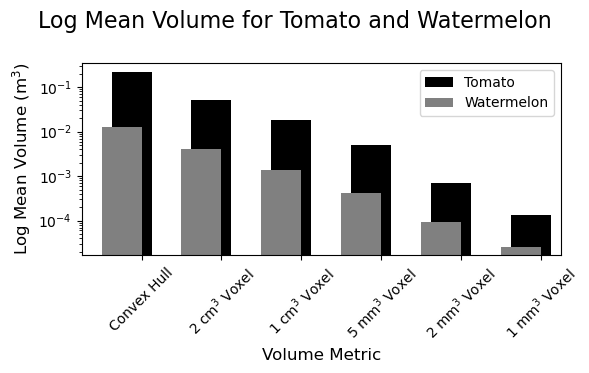

In [15]:
# Create a figure with a side-by-side bar chart for each voxel size
# plot a single ax
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Log Mean Volume for Tomato and Watermelon', fontsize=16, y = 0.95)
# Plot a side-by-side bar chart for each voxel size
df_pivot.plot(x='Volume Metric', y=['Tomato'], kind='bar',
ax=ax, color=['black', 'grey'], width=0.5, position=0.75, logy=True)
df_pivot.plot(x='Volume Metric', y=['Watermelon'], kind='bar',
ax=ax, color=['grey', 'black'], width=0.5, position=1, logy=True)
ax.set_ylabel('Log Mean Volume (m$^{3}$)', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# set	the x axis label
ax.set_xlabel('Volume Metric', fontsize=12)
ax.legend(['Tomato', 'Watermelon'])
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#	Save the figure
fig.savefig('plot_figs/biomass_volumes.png', dpi=300, bbox_inches='tight')